# Trump Tweet EDA

The Data For this notebook is from the trump twitter archive: http://www.trumptwitterarchive.com/archive

In [1]:
import pandas as pd
import numpy as np
import nltk

%matplotlib inline

In [2]:
USER_NAME = 'EdenTrainor' #Configure this with your username
DATA_FILE = 'C:/Users/{}/Datalytyx/Delivery - Documents/Data Science/Data/Trump_Tweets/trump_tweets_05-11-18.csv'.format(USER_NAME)

Import the data as a pandas dataframe

In [3]:
df = pd.read_csv(DATA_FILE)

In [4]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Dana Rohrabacher has been a great Congressman ...,11-05-2018 05:32:10,4677,15407,False,1059317426653933568
1,Twitter for iPhone,John James running as a Republican for the Sen...,11-05-2018 05:04:53,8082,25479,False,1059310562771984390
2,Twitter for iPhone,In just 2 days the people of Tennessee are goi...,11-05-2018 02:00:06,8689,29380,False,1059264061030969344
3,Twitter for iPhone,Thank you for joining us tonight in Tennessee ...,11-05-2018 01:36:10,15660,53542,False,1059258034474704897
4,Twitter for iPhone,Great to be back in Tennessee. On our way to t...,11-04-2018 23:47:01,10104,39654,False,1059230569257680896


In [5]:
#Check Id stings are all unique
df.shape[0] == len(set(df['id_str']))

True

In [6]:
#Set indexes as ids and drop ids
df.index = df['id_str']

In [7]:
df = df.drop(columns = ['id_str'])

### Data Cleaning
Check Dataset is clean:

In [8]:
#Check for empty values
df.isna().sum()

source            0
text              0
created_at        0
retweet_count     0
favorite_count    0
is_retweet        0
dtype: int64

### Feature Exatraction
Number of words:

In [9]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(' ')))

In [10]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,word_count
id_str,,,,,,,
1059317426653933568,Twitter for iPhone,Dana Rohrabacher has been a great Congressman ...,11-05-2018 05:32:10,4677,15407,False,54
1059310562771984390,Twitter for iPhone,John James running as a Republican for the Sen...,11-05-2018 05:04:53,8082,25479,False,48
1059264061030969344,Twitter for iPhone,In just 2 days the people of Tennessee are goi...,11-05-2018 02:00:06,8689,29380,False,41
1059258034474704897,Twitter for iPhone,Thank you for joining us tonight in Tennessee ...,11-05-2018 01:36:10,15660,53542,False,14
1059230569257680896,Twitter for iPhone,Great to be back in Tennessee. On our way to t...,11-04-2018 23:47:01,10104,39654,False,24


Number of characters:

In [11]:
df['char_count'] = df['text'].str.len() ## this also includes spaces
df[['text','char_count']].head()

,text,char_count
id_str,,
1059317426653933568,Dana Rohrabacher has been a great Congressman ...,282
1059310562771984390,John James running as a Republican for the Sen...,273
1059264061030969344,In just 2 days the people of Tennessee are goi...,253
1059258034474704897,Thank you for joining us tonight in Tennessee ...,109
1059230569257680896,Great to be back in Tennessee. On our way to t...,145


Average word length:

In [12]:
def avg_word(sentence):
    
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
id_str,,
1059317426653933568,Dana Rohrabacher has been a great Congressman ...,4.240741
1059310562771984390,John James running as a Republican for the Sen...,4.708333
1059264061030969344,In just 2 days the people of Tennessee are goi...,5.195122
1059258034474704897,Thank you for joining us tonight in Tennessee ...,6.857143
1059230569257680896,Great to be back in Tennessee. On our way to t...,5.083333


Number of stop words:

In [13]:
stopwords = nltk.corpus.stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))
df[['text','stopwords']].head()

,text,stopwords
id_str,,
1059317426653933568,Dana Rohrabacher has been a great Congressman ...,25
1059310562771984390,John James running as a Republican for the Sen...,19
1059264061030969344,In just 2 days the people of Tennessee are goi...,15
1059258034474704897,Thank you for joining us tonight in Tennessee ...,3
1059230569257680896,Great to be back in Tennessee. On our way to t...,9


Count number of hastags:

In [14]:
df['hashtags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text','hashtags']].head()

,text,hashtags
id_str,,
1059317426653933568,Dana Rohrabacher has been a great Congressman ...,0
1059310562771984390,John James running as a Republican for the Sen...,0
1059264061030969344,In just 2 days the people of Tennessee are goi...,0
1059258034474704897,Thank you for joining us tonight in Tennessee ...,0
1059230569257680896,Great to be back in Tennessee. On our way to t...,1


Count the number of external links:

In [15]:
df['ext_links'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('http')]))
df[['text','ext_links']].head()

,text,ext_links
id_str,,
1059317426653933568,Dana Rohrabacher has been a great Congressman ...,0
1059310562771984390,John James running as a Republican for the Sen...,0
1059264061030969344,In just 2 days the people of Tennessee are goi...,1
1059258034474704897,Thank you for joining us tonight in Tennessee ...,1
1059230569257680896,Great to be back in Tennessee. On our way to t...,1


Count the number of numerics:

In [16]:
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','numerics']].head()

,text,numerics
id_str,,
1059317426653933568,Dana Rohrabacher has been a great Congressman ...,0
1059310562771984390,John James running as a Republican for the Sen...,0
1059264061030969344,In just 2 days the people of Tennessee are goi...,1
1059258034474704897,Thank you for joining us tonight in Tennessee ...,0
1059230569257680896,Great to be back in Tennessee. On our way to t...,0


In [17]:
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['text','upper']].head()

,text,upper
id_str,,
1059317426653933568,Dana Rohrabacher has been a great Congressman ...,0
1059310562771984390,John James running as a Republican for the Sen...,1
1059264061030969344,In just 2 days the people of Tennessee are goi...,6
1059258034474704897,Thank you for joining us tonight in Tennessee ...,4
1059230569257680896,Great to be back in Tennessee. On our way to t...,0


In [18]:
df['created_at'].iloc[1]

'11-05-2018 05:04:53'

## Preprocessing
#### Stemming

In [19]:
# from nltk.stem import PorterStemmer
# st = PorterStemmer()

# df['text'] = df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# df.head()

Remove @realDonaldTrump and https links:

In [33]:
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if not (word.startswith('http') or
                                                                        ('@' in word) or 
                                                                        ('realDonaldTrump' in word) or 
                                                                        (word in stopwords) or
                                                                        ('amp' in word))]))

Remove retweets:

In [21]:
df = df[df.is_retweet == False ]
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,word_count,char_count,avg_word,stopwords,hashtags,ext_links,numerics,upper
id_str,,,,,,,,,,,,,,
1059317426653933568,Twitter for iPhone,Dana Rohrabacher has been a great Congressman ...,11-05-2018 05:32:10,4677,15407,False,54,282,4.240741,25,0,0,0,0
1059310562771984390,Twitter for iPhone,John James running as a Republican for the Sen...,11-05-2018 05:04:53,8082,25479,False,48,273,4.708333,19,0,0,0,1
1059264061030969344,Twitter for iPhone,In just 2 days the people of Tennessee are goi...,11-05-2018 02:00:06,8689,29380,False,41,253,5.195122,15,0,1,1,6
1059258034474704897,Twitter for iPhone,Thank you for joining us tonight in Tennessee ...,11-05-2018 01:36:10,15660,53542,False,14,109,6.857143,3,0,1,0,4
1059230569257680896,Twitter for iPhone,Great to be back in Tennessee. On our way to t...,11-04-2018 23:47:01,10104,39654,False,24,145,5.083333,9,1,1,0,0


## Visualizations
#### Make Word Cloud

In [24]:
import PIL


In [25]:
nltk.download('stopwords')  # Common words to ignore
nltk.download('punkt')  # Punkt Sentence Tokenizer - more useful in large documents

#Generate english stopword list - these are connector words that hold no information (except semantic)
stopwords = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EdenTrainor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EdenTrainor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
word_bag = df['text'].values

(-0.5, 399.5, 199.5, -0.5)

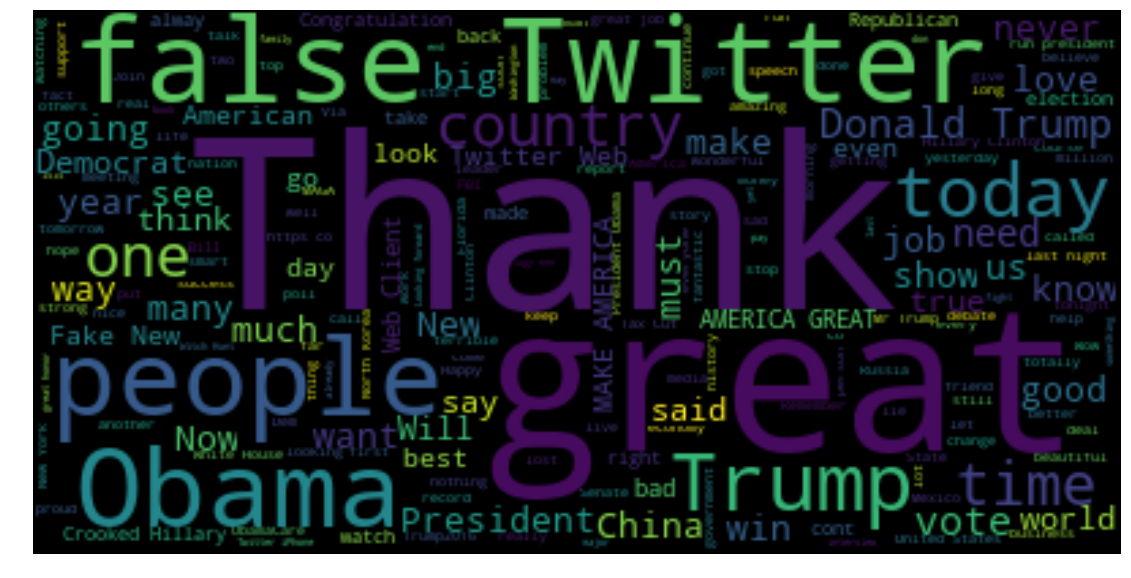

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Start with one review:
# text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(word_bag))

# Display the generated image:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")